# Part I - Fordgobike Exploration
## by Azeez Yetunde

## Introduction
This document explores a dataset containing 183,412 rides made in a bike-sharing system covering the greater San Francisco bay area.

## Preliminary Wrangling


In [46]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [47]:
# load in the dataset into a pandas dataframe, print statistics
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [48]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [49]:
# descriptive statistics
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [50]:
# sum of missing values
fordgobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [51]:
# replace missing values in the data

for missing_values in ['start_station_name', 'start_station_id', 'start_station_id', 'end_station_id', 'end_station_name',  'member_birth_year']:
    fordgobike[missing_values] = fordgobike[missing_values].fillna(fordgobike[missing_values].mode()[0])

In [52]:
fordgobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [53]:
# replace missing value in the column for member_gender

fordgobike['member_gender'] = fordgobike['member_gender'].fillna('Other')

In [54]:
# convert start_time data type to datatime
fordgobike.start_time = pd.to_datetime(fordgobike.start_time)

# convert end_time data type to datatime
fordgobike.end_time = pd.to_datetime(fordgobike.end_time)

# convert start_time data type to datatime
fordgobike.start_time = pd.to_datetime(fordgobike.start_time)

# convert end_time data type to datatime
fordgobike.end_time = pd.to_datetime(fordgobike.end_time)

# convert start_date and end_date to datetime format
import datetime as dt

fordgobike['start_day'] =  fordgobike['start_time'].dt.day_name()
fordgobike['start_month'] =  fordgobike['start_time'].dt.month_name()
fordgobike['start_hr'] =  fordgobike['start_time'].dt.hour
fordgobike['start_min'] =  fordgobike['start_time'].dt.minute

fordgobike['end_day'] =  fordgobike['end_time'].dt.day_name()
fordgobike['end_month'] =  fordgobike['end_time'].dt.month_name()
fordgobike['end_hr'] =  fordgobike['end_time'].dt.hour
fordgobike['end_min'] =  fordgobike['end_time'].dt.minute



In [55]:
# convert bike_id data type to string
fordgobike.bike_id = fordgobike.bike_id.astype(str)

# convert start_station_id data type to string
fordgobike.start_station_id = fordgobike.start_station_id.astype(str)

# convert end_station_id data type to string
fordgobike.end_station_id = fordgobike.end_station_id.astype(str)

# convert start_hr data type to string
fordgobike['start_hr'] =  fordgobike['start_hr'].astype(str)

# convert start_min data type to string
fordgobike['start_min'] =  fordgobike['start_min'].astype(str)

# convert end_hr data type to string
fordgobike['end_hr'] =  fordgobike['end_hr'].astype(str)

# convert end_min data type to string
fordgobike['end_min'] =  fordgobike['end_min'].astype(str)



In [56]:
# age of each member
fordgobike['member_age'] = 2019 - fordgobike['member_birth_year']

In [57]:
# convert member_age to integer

fordgobike['member_age'] =  fordgobike['member_age'].astype('int64')

In [58]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183412 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183412 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          183412 non-null float64
member_gender              183412 non-null object
bike_share_for_all_trip    183412 non-null object
start_day                  183412 non-null object
start_month        

In [59]:
# high-level overview of data shape and composition
print(fordgobike.shape)
print(fordgobike.dtypes)
print(fordgobike.head(10))

(183412, 25)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_day                          object
start_month                        object
start_hr                           object
start_min                          object
end_day                            object
end_month                          object
end_hr                             object
end_min              

In [60]:
# convert start_month and start_day into ordered categorical types
ordinal_var_dict = {'start_month': ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                   'end_month': ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']}
    

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgobike[var] = fordgobike[var].astype(ordered_var)

In [61]:
# descriptive statistics for numeric variables
print(fordgobike.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  \
count         183412.000000          183412.000000      183412.000000   
mean              37.771427            -122.352250        1984.950347   
std                0.099490               0.116673           9.908290   
min               37.317298            -122.453704

### What is the structure of your dataset?

The data set consists of 183,412 rides made in a bike-sharing system covering the greater San Francisco bay area with 15 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender).

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the time (both the end and start time) and location (both the end and start time) where the trips took place. Also, the characteristics of the user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect features like user_type, member_birth_year, member_gender and duration_sec 
will help to support my investigation.

## Univariate Exploration

## What is the distribution of the gender?

In [62]:
# references: ideas gotten from udacity

def counting_plot(fordgobike, series, title, x_label, y_label, color):
    plt.figure(figsize=(15,5))
    count_plot = sb.countplot(x = fordgobike[series])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return count_plot

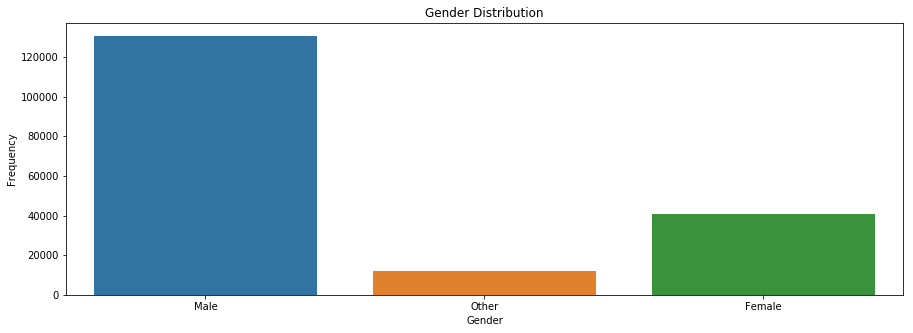

In [63]:
counting_plot(fordgobike, 'member_gender', 'Gender Distribution', 'Gender', 'Frequency', 'base_color');

It can be seen that the male gender has the highest count

## What is the distribution of the start day and end day?

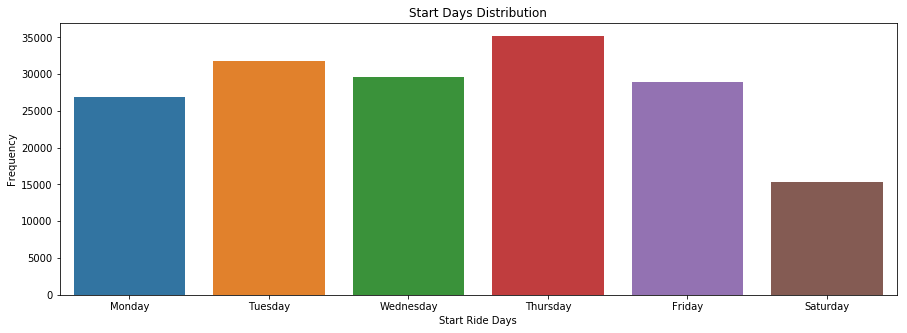

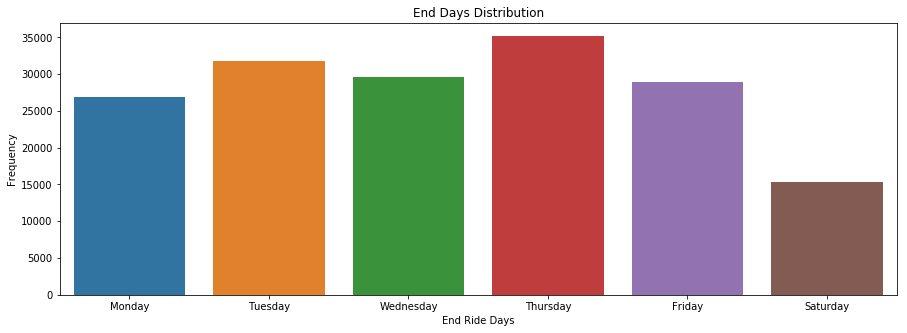

In [64]:
# references: ideas gotten from udacity
# Frequency of Start day ride

base_color = sb.color_palette()[0]
counting_plot(fordgobike, 'start_day', 'Start Days Distribution', 'Start Ride Days', 'Frequency', color = base_color);
 
base_color = sb.color_palette()[3]
counting_plot(fordgobike, 'start_day', 'End Days Distribution', 'End Ride Days', 'Frequency', color = base_color);

It can be seen from the above figures that most of the trips for both start and end days were on Thursdays while weekend (Saturday) has the lowest trip.

## What is the distribution of the user_type?

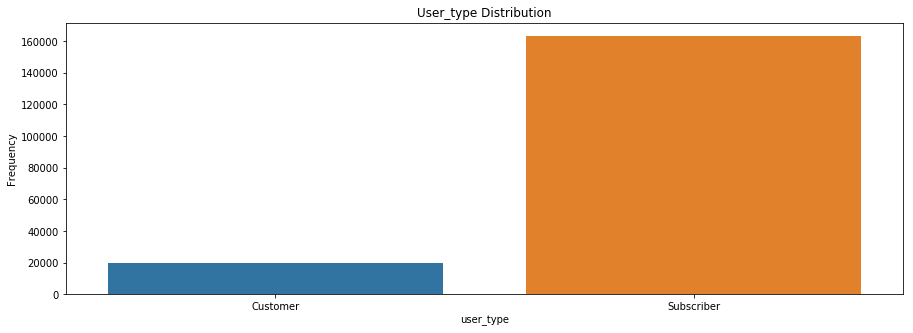

In [65]:
# references: ideas gotten from udacity

# user_type distribution
counting_plot(fordgobike, 'user_type', 'User_type Distribution', 'user_type', 'Frequency', color = base_color);

It can be seen that the subscribers are more than the customers.

## What is the distribution of the age?

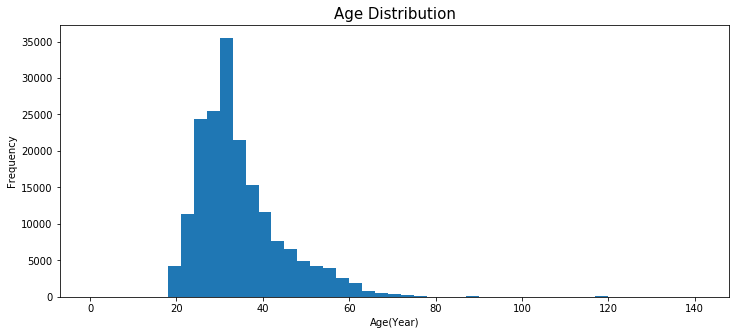

In [66]:
# references: ideas gotten from udacity

# Age distribution
plt.figure(figsize=(12,5))
bins = np.arange(0, fordgobike['member_age'].max()+3, 3)
plt.hist(data = fordgobike, x = 'member_age', bins = bins)
plt.title('Age Distribution', fontsize = 15)
plt.xlabel('Age(Year)')
plt.ylabel('Frequency');

From the above plot, it can be seen that the plot is right skewed with a long tail on the right and majority of the user's ages are between 30 and 39 years old

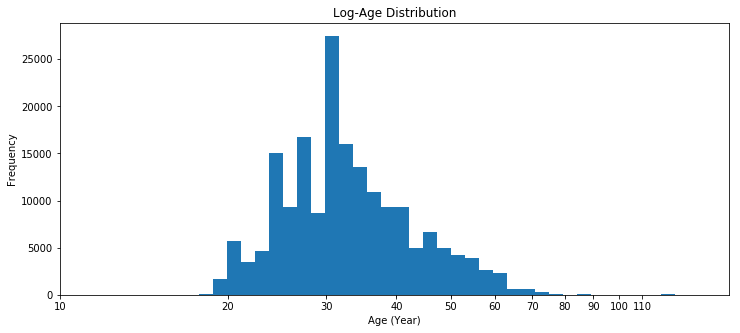

In [67]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(fordgobike['member_age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = fordgobike, x = 'member_age', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.title('Log-Age Distribution')
plt.xlabel('Age (Year)')
plt.ylabel('Frequency');


It can be seen from the above plot that majority of the user's ages are between 30 and 35 years old

## What is the distribution of the duration in seconds?

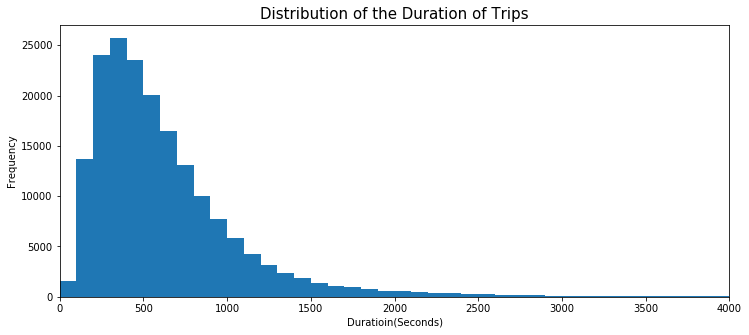

In [68]:
# references: ideas gotten from udacity

# Duration of trip distribution
plt.figure(figsize=(12,5))
bins = np.arange(0, fordgobike['duration_sec'].max()+100, 100)
plt.hist(data = fordgobike, x = 'duration_sec', bins = bins)
plt.xlim(0, 4000)
plt.title('Distribution of the Duration of Trips', fontsize = 15)
plt.xlabel('Duratioin(Seconds)')
plt.ylabel('Frequency');

From the above plot, it can be seen that the plot is right skewed with a long tail on the right 

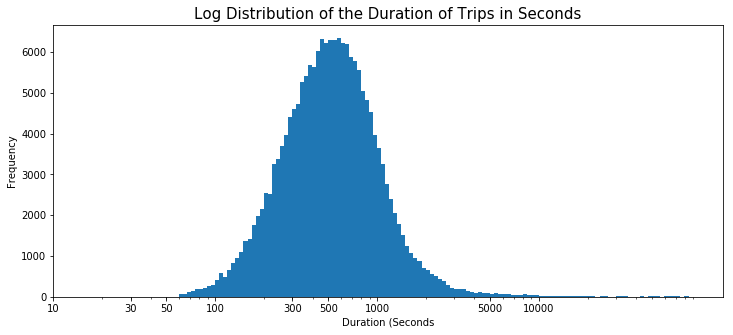

In [69]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(fordgobike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = fordgobike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 50, 100, 300, 500, 1000, 5000, 10000], [10, 30, 50, 100, 300, 500, 1000, 5000, 10000])
plt.xlabel('Duration (Seconds')
plt.ylabel('Frequency')
plt.title('Log Distribution of the Duration of Trips in Seconds', fontsize = 15);


From the above figure, it can be seen that most of the duration of trips fall under 500 seconds and it follows a normal distribution.

## What is the distribution of the duration in minutes?

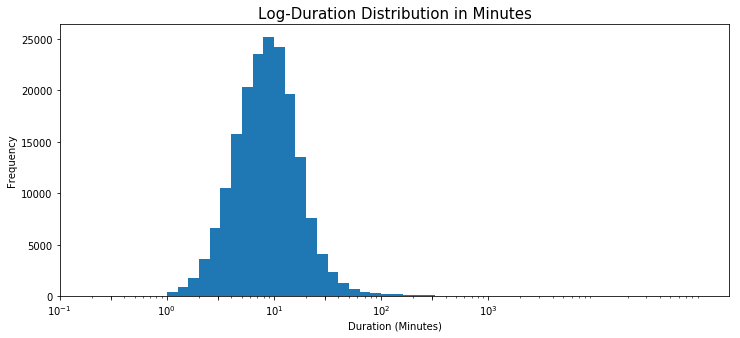

In [70]:
# references: ideas gotten from udacity

# there's a long tail in the distribution, so let's put it on a log scale instead
fordgobike['duration_min'] = fordgobike['duration_sec'] / 60

bins = 10 ** np.arange(0, 5+0.1, 0.1)
plt.figure(figsize=[12, 5])
plt.hist(data = fordgobike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000])
plt.title('Log-Duration Distribution in Minutes' , fontsize = 15)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency');

It can be seen that most of the trips in minutes fall under 100 mins.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the users are subscribers and males.
Most of the rides of the users are on Thursday.
The age distribution of users shows a long tail distribution.
The age distribution of the users shows outliers. Also since the age distribution is right skewed, a log transformation was done. In the transformation, most of the age of users is between 30 and 35 years old. 

The duration in seconds of rides shows a long tail distribution and a log transformation was done in seconds and minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Some of the ages are not correct , this shows the presence of outliers in the age. Rows with missing data for age and genderwere also removed before the exploration was performed.


## Bivariate Exploration

### What is the duration of the trips for each user type in minutes?

In [71]:
# references: ideas gotten from udacity and google

plt.figure(figsize=(8,5))
           


def plotting_bar(fordgobike, x, series, title, x_label, y_label):
    plt.figure(figsize=(10,5))
    bar_chart = fordgobike.groupby(x)[series].mean().plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return bar_chart

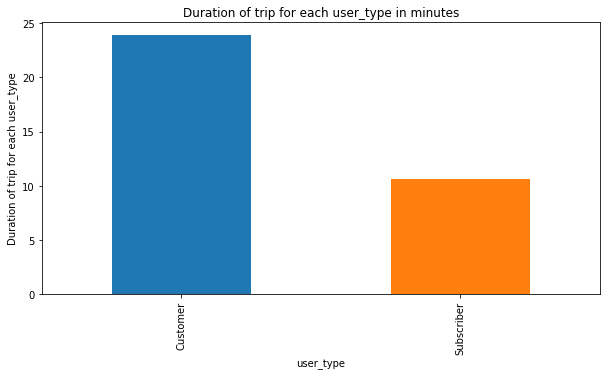

In [72]:
plotting_bar(fordgobike, 'user_type', 'duration_min', 'Duration of trip for each user_type in minutes', 'user_type', 'Duration of trip for each user_type');

It can be seen from the above figure that the customers go on longer trips than the subcribers since the cutomers has the highest trips.

### Does the age of members determine the user_type? 

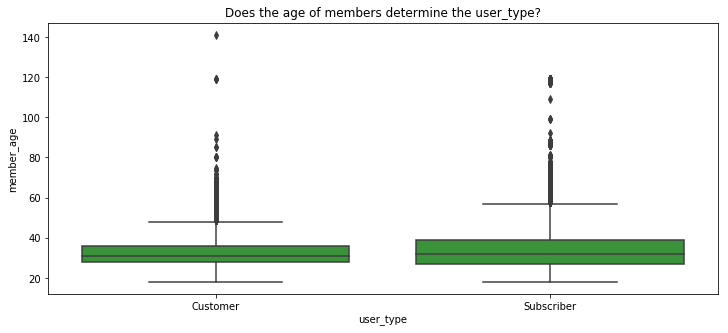

In [74]:
# references: ideas gotten from udacity and google search

plt.figure(figsize=(12,5))
base_color = sb.color_palette()[2]
sb.boxplot(data=fordgobike, x = 'user_type', y = 'member_age', color = base_color)
plt.ylabel('member_age')
plt.xlabel('user_type')
plt.title('Does the age of members determine the user_type?');

The above figure shows that the ages of the customer type are more than the subscriber type 

### What is the duration of trip for each user_type in minutes?

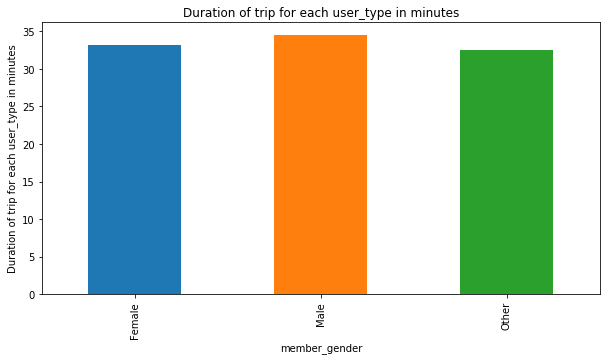

In [75]:
# references: ideas gotten from udacity

fordgobike['duration_min'] = fordgobike['duration_sec'] / 60
plotting_bar(fordgobike, 'member_gender', 'member_age', 'Duration of trip for each user_type in minutes', 'member_gender', 'Duration of trip for each user_type in minutes');

It can be seen from the figure above that the male gender travelled the longest trip followed by the female gender and then the other gender.

### What is the relationship between member age and duration in seconds?

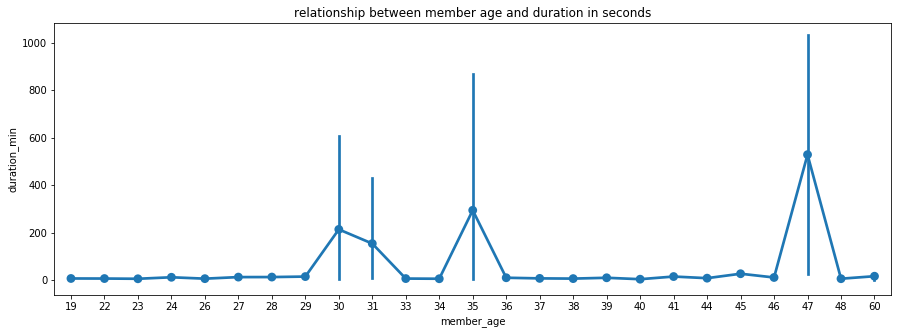

In [76]:
# references: ideas gotten from online search

plt.figure(figsize=(15,5))
ax = sb.pointplot(data = fordgobike.head(50), x = 'member_age', y = 'duration_min')
plt.title('relationship between member age and duration in seconds')
plt.ylabel('duration_min')
plt.xlabel('member_age');

From the graph, there is no relationship between the members age and the duration of trips travelled

### What is the relationship between age and bike_share_for_all_trip?

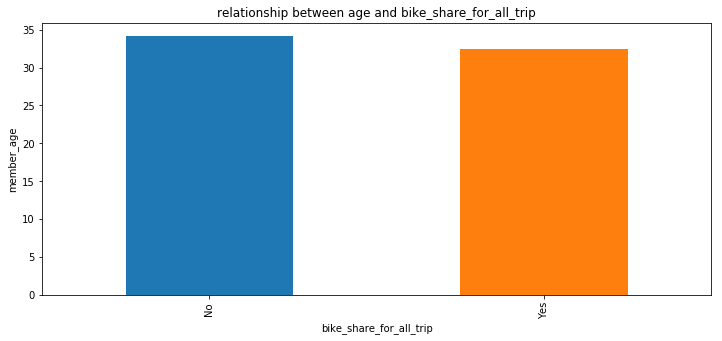

In [77]:
# references: ideas gotten from udacity

plt.figure(figsize=(12,5))
           
fordgobike.groupby('bike_share_for_all_trip')['member_age'].mean().plot(kind='bar')
plt.ylabel('member_age')
plt.xlabel('bike_share_for_all_trip')
plt.title('relationship between age and bike_share_for_all_trip');


From the above graph, most of the members did not share their trips

### What is the relationship between all the numerical variables?

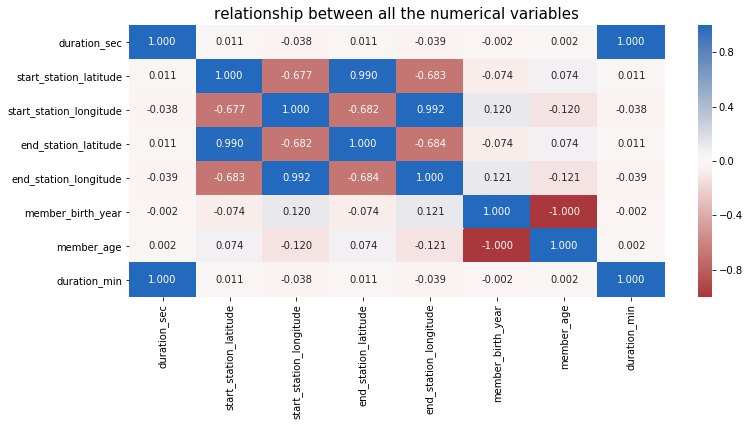

In [80]:
# references: ideas gotten from udacity

#correlation

plt.figure(figsize = [12, 5])
sb.heatmap(fordgobike.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('relationship between all the numerical variables', fontsize = 15)
plt.show()

It can be seen that There is no correlation between any of the variables and time (duration_min and duration_sec).
There is a strong correlation between start_station_longitude and end_station_longitude and between start_station_latiitude and end_station_latitudeitude.
There is a weak correlation between member_age and duration_min, start_station_latiitude, end_station_latiitude.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The customers travelled the longest trips than the subcribers since the cutomers has the highest duration of trips which is quite surprising. Also, the relationship that exists between the member age and the duration (minutes) travelled is not stable. The customers showed some outliers in their ages than the subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The highest number of members of different ages did not share their trips

## Multivariate Exploration

### What is the relationship between start_day, duration_sec and the user_type?

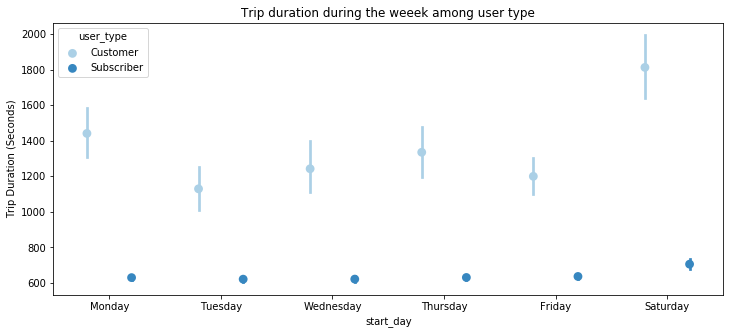

In [81]:
# references: ideas gotten from udacity

fig = plt.figure(figsize = [12,5])
ax = sb.pointplot(data = fordgobike, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip duration during the weeek among user type')
plt.ylabel('Trip Duration (Seconds)')
ax.set_yticklabels([],minor = True)
plt.show();

From the figure above, customers travelled the longer distances during the weekday but travelled the longest distances during the weekend (Saturday) while subscribers travelled the shortest distances during the weekday but travelled little more distance on weekend (Saturday 

### What is the relationship between member_gender, duration_sec and the user_type?

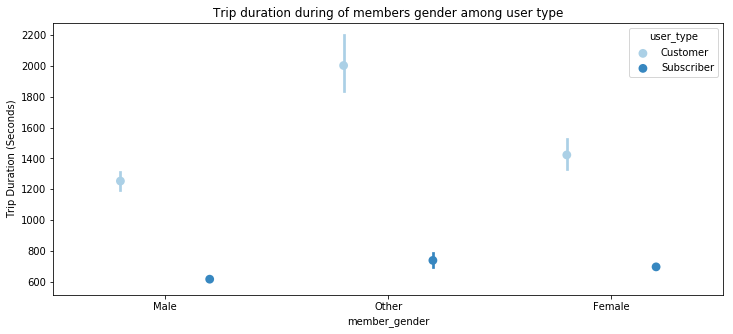

In [82]:
# references: ideas gotten from udacity

fig = plt.figure(figsize = [12,5])
ax = sb.pointplot(data = fordgobike, x = 'member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip duration during of members gender among user type')
plt.ylabel('Trip Duration (Seconds)')
ax.set_yticklabels([],minor = True)
plt.show();

From the figure above, other customer type travelled the longest distances followed by the female customer type and then male customer type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers travelled the longer distances during the weekday but travelled the longest distances during the weekend (Saturday) while subscribers travelled the shortest distances during the weekday but travelled little more distance on weekend (Saturday).
Other customer type travelled the longest distances followed by the female customer type and then male customer type.
The male subscribers followed by the male customers travelled the longest distances then the female subscribers and so on.

### Were there any interesting or surprising interactions between features?

No relationship exists between any of the variables and time (duration_min and duration_sec).

## Conclusions

For the user types, Customers go on longer trips than the subcribers. Also, For the user types, Customers go on longer trips than the subcribers. Also, Customers travelled more distances during the weekday but travelled the longest distances during the weekend (Saturday) while subscribers travelled the shortest distances during the weekday but travelled little more distance on weekend (Saturday)

During the data wrangling stage, I replaced the missing values in the member_gender column with other. I also replaced the missing values in start_station_name, start_station_id, start_station_id, end_station_id, end_station_name and member_birth_year with their respective modes. I created exra columns for member_age, duration_min, start_month, start_day, start_hr, start_min, end_day, end_month, end_hr and end_min. Then my data exploration analysis was performed with the dataset
